In [1]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(1)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import pandas as pd

In [3]:
redquality_df = pd.read_csv('../winequality-red.csv')
redquality_df.head()

redquality_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
y = redquality_df["quality"]

X = redquality_df.drop("quality", axis=1)

In [5]:
print(f"Labels: {y[:10]}")
print(f"Data: {X[:10]}")

Labels: 0    5
1    5
2    5
3    6
4    5
5    5
6    5
7    7
8    7
9    5
Name: quality, dtype: int64
Data:    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total

In [6]:
y_arr = y.to_numpy()
y_arr

X_arr = X
X_arr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [7]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, random_state=1)

In [8]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [9]:
# Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

 

In [12]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=11))
model.add(Dense(units=9, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 63        
Total params: 135
Trainable params: 135
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Fit the model to the training data
history = model.fit(
    X_train_scaled,
    y_train_categorical,
    validation_split = 0.33,
    epochs=20,
    shuffle=True,
    verbose=2
)

Train on 803 samples, validate on 396 samples
Epoch 1/20
803/803 - 1s - loss: 2.4606 - accuracy: 0.1009 - val_loss: 2.4055 - val_accuracy: 0.1591
Epoch 2/20
803/803 - 0s - loss: 2.3260 - accuracy: 0.1980 - val_loss: 2.2835 - val_accuracy: 0.2601
Epoch 3/20
803/803 - 0s - loss: 2.2141 - accuracy: 0.2964 - val_loss: 2.1783 - val_accuracy: 0.3510
Epoch 4/20
803/803 - 0s - loss: 2.1180 - accuracy: 0.3512 - val_loss: 2.0858 - val_accuracy: 0.3990
Epoch 5/20
803/803 - 0s - loss: 2.0314 - accuracy: 0.3848 - val_loss: 2.0033 - val_accuracy: 0.4217
Epoch 6/20
803/803 - 0s - loss: 1.9529 - accuracy: 0.3960 - val_loss: 1.9245 - val_accuracy: 0.4444
Epoch 7/20
803/803 - 0s - loss: 1.8806 - accuracy: 0.4159 - val_loss: 1.8549 - val_accuracy: 0.4571
Epoch 8/20
803/803 - 0s - loss: 1.8144 - accuracy: 0.4271 - val_loss: 1.7896 - val_accuracy: 0.4621
Epoch 9/20
803/803 - 0s - loss: 1.7518 - accuracy: 0.4309 - val_loss: 1.7271 - val_accuracy: 0.4621
Epoch 10/20
803/803 - 0s - loss: 1.6922 - accuracy: 0.

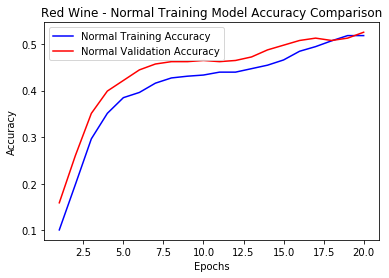

In [16]:
fig = plt.figure()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
Epochs = range(1, len(acc)+1)
plt.plot(Epochs, acc, "b", label="Normal Training Accuracy")
plt.plot(Epochs, val_acc, "r", label="Normal Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Red Wine - Normal Training Model Accuracy Comparison")
plt.legend()
plt.show()

fig.savefig('NormalRedWineAccuracyComparison.png')

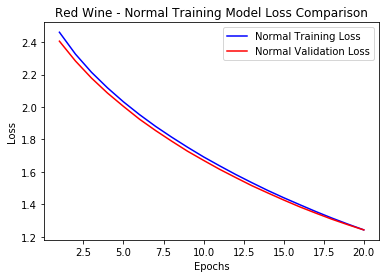

In [17]:
fig = plt.figure()

loss = history.history["loss"]
val_loss = history.history["val_loss"]
Epochs = range(1, len(loss)+1)
plt.plot(Epochs, loss, "b", label="Normal Training Loss")
plt.plot(Epochs, val_loss, "r", label="Normal Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Red Wine - Normal Training Model Loss Comparison")
plt.legend()
plt.show()

fig.savefig('NormalRedWineLossComparison.png')

# Deep Learning
For this network, we simply add an additional hidden layer of 6 nodes

In [18]:
deep_model = Sequential()
deep_model.add(Dense(units=20, activation='relu', input_dim=11))
deep_model.add(Dense(units=20, activation='relu'))
deep_model.add(Dense(units=9, activation='softmax'))

In [19]:
deep_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                240       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 189       
Total params: 849
Trainable params: 849
Non-trainable params: 0
_________________________________________________________________


In [20]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_history = deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    validation_split = 0.33,
    epochs=20,
    shuffle=True,
    verbose=2
)

Train on 803 samples, validate on 396 samples
Epoch 1/20
803/803 - 1s - loss: 1.9670 - accuracy: 0.3288 - val_loss: 1.7626 - val_accuracy: 0.4192
Epoch 2/20
803/803 - 0s - loss: 1.6593 - accuracy: 0.4234 - val_loss: 1.5181 - val_accuracy: 0.4596
Epoch 3/20
803/803 - 0s - loss: 1.4530 - accuracy: 0.4670 - val_loss: 1.3578 - val_accuracy: 0.4747
Epoch 4/20
803/803 - 0s - loss: 1.3195 - accuracy: 0.4932 - val_loss: 1.2574 - val_accuracy: 0.4798
Epoch 5/20
803/803 - 0s - loss: 1.2301 - accuracy: 0.5430 - val_loss: 1.1926 - val_accuracy: 0.5177
Epoch 6/20
803/803 - 0s - loss: 1.1711 - accuracy: 0.5841 - val_loss: 1.1536 - val_accuracy: 0.5328
Epoch 7/20
803/803 - 0s - loss: 1.1290 - accuracy: 0.5940 - val_loss: 1.1276 - val_accuracy: 0.5455
Epoch 8/20
803/803 - 0s - loss: 1.0970 - accuracy: 0.6027 - val_loss: 1.1111 - val_accuracy: 0.5556
Epoch 9/20
803/803 - 0s - loss: 1.0737 - accuracy: 0.5978 - val_loss: 1.0975 - val_accuracy: 0.5581
Epoch 10/20
803/803 - 0s - loss: 1.0543 - accuracy: 0.

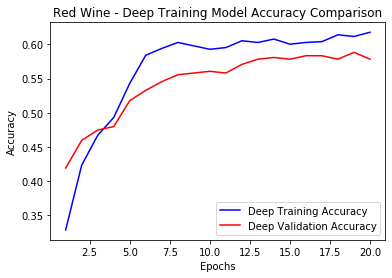

In [21]:
fig = plt.figure()

acc = deep_history.history["accuracy"]
val_acc = deep_history.history["val_accuracy"]
Epochs = range(1, len(acc)+1)
plt.plot(Epochs, acc, "b", label="Deep Training Accuracy")
plt.plot(Epochs, val_acc, "r", label="Deep Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Red Wine - Deep Training Model Accuracy Comparison")
plt.legend()
plt.show()

fig.savefig('DeepRedWineAccuracyComparison.png')

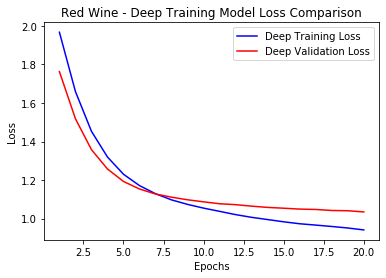

In [22]:
fig = plt.figure()

loss = deep_history.history["loss"]
val_loss = deep_history.history["val_loss"]
Epochs = range(1, len(loss)+1)
plt.plot(Epochs, loss, "b", label="Deep Training Loss")
plt.plot(Epochs, val_loss, "r", label="Deep Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Red Wine - Deep Training Model Loss Comparison")
plt.legend()
plt.show()

fig.savefig('DeepRedWineLossComparison.png')

In [23]:
deep_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Compare the models below

In [24]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

400/400 - 0s - loss: 1.2067 - accuracy: 0.5650
Normal Neural Network - Loss: 1.2066700744628907, Accuracy: 0.5649999976158142


In [25]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

400/400 - 0s - loss: 0.9963 - accuracy: 0.6250
Deep Neural Network - Loss: 0.9963156700134277, Accuracy: 0.625
